In [1]:
from constantSum import ConstantSum_swap
from token_class import Token
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = ConstantSum_swap([Token('a', 100), Token('b', 100)])

In [3]:
s.getTokens()[0].getAmount()

100

In [4]:
s.cost_function()

200

Osetljivost na likvidnost

In [5]:
init = [50, 100, 500, 1000, 5000, 10000]

In [6]:
for i in init:
    swap_liquidity = ConstantSum_swap([Token('a', i), Token('b', i)])
    print(i)
    print('c0 = ' ,round(swap_liquidity.cost_function(), 4))
    print('p1_0 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[0]), 4))
    print('p2_0 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[1]), 4))
    pay = swap_liquidity.swap('buy','a', 10)
    print('pay = ', round(pay, 4))
    print('p1_1 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[0]), 4))
    print('p2_1 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[1]), 4))
    
    swap_liquidity.poolState()
    print()

50
c0 =  100
p1_0 =  1
p2_0 =  1
pay =  10
p1_1 =  1
p2_1 =  1
Token:
	name:  a 	amount:  40
Token:
	name:  b 	amount:  60

100
c0 =  200
p1_0 =  1
p2_0 =  1
pay =  10
p1_1 =  1
p2_1 =  1
Token:
	name:  a 	amount:  90
Token:
	name:  b 	amount:  110

500
c0 =  1000
p1_0 =  1
p2_0 =  1
pay =  10
p1_1 =  1
p2_1 =  1
Token:
	name:  a 	amount:  490
Token:
	name:  b 	amount:  510

1000
c0 =  2000
p1_0 =  1
p2_0 =  1
pay =  10
p1_1 =  1
p2_1 =  1
Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1010

5000
c0 =  10000
p1_0 =  1
p2_0 =  1
pay =  10
p1_1 =  1
p2_1 =  1
Token:
	name:  a 	amount:  4990
Token:
	name:  b 	amount:  5010

10000
c0 =  20000
p1_0 =  1
p2_0 =  1
pay =  10
p1_1 =  1
p2_1 =  1
Token:
	name:  a 	amount:  9990
Token:
	name:  b 	amount:  10010



Nezavisnost putanje

In [7]:
swap_path_idepedent = ConstantSum_swap([Token('a', 100), Token('b', 100)])
s = 0
for i in range(10):
    pay = round(swap_path_idepedent.swap('buy', 'a', 1), 5)
    print()
    print('Korisnik placa: ', round(pay, 5))
    swap_path_idepedent.poolState()
    s += pay
print()
print('Ukupni troskovi', round(s, 4))


Korisnik placa:  1
Token:
	name:  a 	amount:  99
Token:
	name:  b 	amount:  101

Korisnik placa:  1
Token:
	name:  a 	amount:  98
Token:
	name:  b 	amount:  102

Korisnik placa:  1
Token:
	name:  a 	amount:  97
Token:
	name:  b 	amount:  103

Korisnik placa:  1
Token:
	name:  a 	amount:  96
Token:
	name:  b 	amount:  104

Korisnik placa:  1
Token:
	name:  a 	amount:  95
Token:
	name:  b 	amount:  105

Korisnik placa:  1
Token:
	name:  a 	amount:  94
Token:
	name:  b 	amount:  106

Korisnik placa:  1
Token:
	name:  a 	amount:  93
Token:
	name:  b 	amount:  107

Korisnik placa:  1
Token:
	name:  a 	amount:  92
Token:
	name:  b 	amount:  108

Korisnik placa:  1
Token:
	name:  a 	amount:  91
Token:
	name:  b 	amount:  109

Korisnik placa:  1
Token:
	name:  a 	amount:  90
Token:
	name:  b 	amount:  110

Ukupni troskovi 10


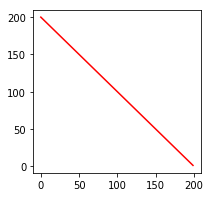

In [8]:
#Kriva vezivanja
swap_g = ConstantSum_swap([Token('a', 100), Token('b', 100)])

x = np.arange(0, swap_g.unknownAmount(0), 1)
y = [swap_g.unknownAmount(i)  for i in x]
plt.figure(figsize=(3, 3))

plt.plot(x, y, color = 'red')
plt.savefig('constantSum.jpeg')
plt.figure().clear()

In [9]:
swapS = ConstantSum_swap([Token('a', 90), Token('b', 100)])


In [10]:
swapS.swap('buy', 'a', 1)

1

Nestalni gubitak i dobit

In [11]:
impLoss1 = ConstantSum_swap([Token('a', 100), Token('b', 100)])

In [12]:
impLoss1.impermanentLostAndGain(impLoss1.getTokens()[1])

0.0

In [13]:
x1 = np.arange(1, impLoss1.unknownAmount(0), 1)

In [14]:
impLoss1.swap('buy', 'a', 99)

99

In [15]:
impLoss1.poolState()

Token:
	name:  a 	amount:  1
Token:
	name:  b 	amount:  199


In [16]:
impL1 = [impLoss1.impermanentLostAndGain(impLoss1.getTokens()[1])]

In [17]:
for i in range(1, len(x1)):
    impLoss1.swap('sell', 'a', 1)
    impL1.append(impLoss1.impermanentLostAndGain(impLoss1.getTokens()[1]))

In [18]:
impLoss2 = ConstantSum_swap([Token('a', 20), Token('b', 400)])

In [19]:
impLoss2.impermanentLostAndGain(impLoss2.getTokens()[1])

0.0

In [20]:
x2 = np.arange(1, impLoss2.unknownAmount(0), 1)

In [21]:
impLoss2.swap('buy', 'a', 19)

19

In [22]:
impLoss2.poolState()

Token:
	name:  a 	amount:  1
Token:
	name:  b 	amount:  419


In [23]:
impL2 = [impLoss2.impermanentLostAndGain(impLoss2.getTokens()[1])]

In [24]:
for i in range(1, len(x2)):
    impLoss2.swap('sell', 'a', 1)
    impL2.append(impLoss2.impermanentLostAndGain(impLoss2.getTokens()[1]))

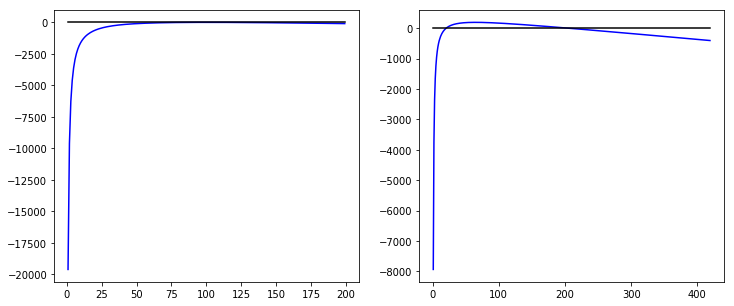

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].plot(x1, impL1, color = 'blue')
axes[0].plot(x1, [0 for i in range (0, len(x1))], color = 'black')
axes[1].plot(x2, impL2, color = 'blue')
axes[1].plot(x2, [0 for i in range (0, len(x2))], color = 'black')
plt.savefig('impermanentLossCS.jpeg')
plt.show()